# **Complete Yolo Model Integration**
#### *GPU and CPU*
#### *Webcam and static Images*

---

In [1]:
import YoloDemonstration as yld

In [2]:
import torch

In [3]:
torch.cuda.empty_cache()

In [4]:
#model, device = yld.load_model('yolov7.pt', device_type='cpu')
model, device = yld.load_model('yolov7.pt', device_type='gpu')

Set device type to CUDA and building for GPU
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block


C:\Users\flori\anaconda3\envs\CNN_Vis\lib\site-packages\torch\nn\modules\module.py:675: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:485.)
  if param.grad is not None:
C:\Users\flori\anaconda3\envs\CNN_Vis\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-d

ret = yld.prediction('input/cat.jpg', model, device, save_img=False)

In [5]:
with torch.no_grad():
    ret = yld.prediction_wo_mp('0', model, device, save_img=False, conf_thres=0.6)

Starting image retrieval thread...
Image retrieval thread started successfully.


C:\Users\flori\anaconda3\envs\CNN_Vis\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Interference Time: 1109.9615097045898 ms
Time for image post-processing: 4.000425338745117 ms
Time for interference & image post-processing: 1113.961935043335 ms
Interference Time: 23.00548553466797 ms
Time for image post-processing: 5.001306533813477 ms
Time for interference & image post-processing: 28.006792068481445 ms
Interference Time: 24.005651473999023 ms
Time for image post-processing: 5.001068115234375 ms
Time for interference & image post-processing: 29.0067195892334 ms
Interference Time: 23.005247116088867 ms
Time for image post-processing: 4.000663757324219 ms
Time for interference & image post-processing: 27.005910873413086 ms
Interference Time: 24.00517463684082 ms
Time for image post-processing: 5.000591278076172 ms
Time for interference & image post-processing: 29.005765914916992 ms
Interference Time: 22.00460433959961 ms
Time for image post-processing: 5.001306533813477 ms
Time for interference & image post-processing: 27.005910873413086 ms
Interference Time: 22.005081

In [7]:
ret = yld.prediction_wo_mp('input/cat.jpg', model, device, save_img=False)

Interference Time: 48.011064529418945 ms
Time for image post-processing: 3.0002593994140625 ms
Time for interference & image post-processing: 51.01132392883301 ms


In [8]:
ret

True

In [18]:
tensor_collection = model.tensor_collection

In [17]:
import pickle
# save pickle
def save_pickle(filename, obj):
    with open(str(filename), 'wb') as f:
        pickle.dump(obj, f)
    print("Object saved")
        
# load pickle
def load_pickle(filename):
    with open(str(filename), 'rb') as f:
        obj = pickle.load(f)
    print("Object loaded")
    return obj

In [19]:
save_pickle('tensor_collection_numpy.pkl', tensor_collection)

Object saved


In [10]:
import numpy as np

In [12]:
t1 = tensor_collection[(0,32,32)]

In [14]:
arr = t1.astype(np.uint8)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

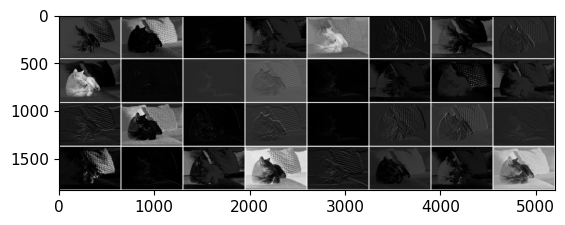

In [16]:
plt.imshow(arr, cmap='gray')

## Threading for better FPS

https://pyimagesearch.com/2015/12/21/increasing-webcam-fps-with-python-and-opencv/

In [2]:
# import the necessary packages
import datetime
from threading import Thread
import cv2

class FPS:
	def __init__(self):
		# store the start time, end time, and total number of frames
		# that were examined between the start and end intervals
		self._start = None
		self._end = None
		self._numFrames = 0
	def start(self):
		# start the timer
		self._start = datetime.datetime.now()
		return self
	def stop(self):
		# stop the timer
		self._end = datetime.datetime.now()
	def update(self):
		# increment the total number of frames examined during the
		# start and end intervals
		self._numFrames += 1
	def elapsed(self):
		# return the total number of seconds between the start and
		# end interval
		return (self._end - self._start).total_seconds()
	def fps(self):
		# compute the (approximate) frames per second
		return self._numFrames / self.elapsed()

In [11]:
# import the necessary packages
class WebcamVideoStream:
    def __init__(self, src=0):
        # initialize the video camera stream and read the first frame
        # from the stream
        self.stream = cv2.VideoCapture(src)
        self.stream.set(cv2.CAP_PROP_FRAME_WIDTH, 1280) # set frame size 720p
        self.stream.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
        self.stream.set(cv2.CAP_PROP_FPS, 30.0) # set FPS
        (self.grabbed, self.frame) = self.stream.read()
        # initialize the variable used to indicate if the thread should
        # be stopped
        self.stopped = False
    def start(self):
        # start the thread to read frames from the video stream
        Thread(target=self.update, args=()).start()
        return self
    def update(self):
        # keep looping infinitely until the thread is stopped
        while True:
            # if the thread indicator variable is set, stop the thread
            if self.stopped:
                return
            # otherwise, read the next frame from the stream
            (self.grabbed, self.frame) = self.stream.read()
    def read(self):
        # return the frame most recently read
        return self.frame
    def stop(self):
        # indicate that the thread should be stopped
        self.stopped = True

        
# import the necessary packages
class WebcamVideoStreamWOThread:
    def __init__(self, src=0):
        # initialize the video camera stream and read the first frame
        # from the stream
        self.stream = cv2.VideoCapture(src)
        self.stream.set(cv2.CAP_PROP_FRAME_WIDTH, 1280) # set frame size 720p
        self.stream.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
        self.stream.set(cv2.CAP_PROP_FPS, 30.0) # set FPS
        (self.grabbed, self.frame) = self.stream.read()
        # initialize the variable used to indicate if the thread should
        # be stopped
        self.stopped = False
    #def start(self):
        # start the thread to read frames from the video stream
        #Thread(target=self.update, args=()).start()
        #return self
    def update(self):
        # keep looping infinitely until the thread is stopped
        #while True:
            # if the thread indicator variable is set, stop the thread
        if self.stopped:
            return
        # otherwise, read the next frame from the stream
        (self.grabbed, self.frame) = self.stream.read()
    def read(self):
        # return the frame most recently read
        return self.frame
    def stop(self):
        # indicate that the thread should be stopped
        self.stopped = True
        self.stream.release()

In [12]:
show_frame = True

In [10]:
vs.stream.release()

In [8]:
vs = WebcamVideoStreamWOThread(src=1)

In [9]:
ret, frame = vs.stream.read()

In [13]:
vs = WebcamVideoStreamWOThread(src=1)
fps = FPS().start()
# loop over some frames...this time using the threaded stream
while fps._numFrames < 150:
	# grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
	ret, frame = vs.stream.read()
	#frame = imutils.resize(frame, width=400)
	# check to see if the frame should be displayed to our screen
	if show_frame:
		cv2.imshow("Frame", frame)
		key = cv2.waitKey(1) & 0xFF
	# update the FPS counter
	fps.update()
# stop the timer and display FPS information
fps.stop()
vs.stopped = True
print("[INFO] elasped time: {:.2f}".format(fps.elapsed()))
print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))
# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

[INFO] elasped time: 5.01
[INFO] approx. FPS: 29.93


In [16]:
vs = WebcamVideoStream(src=1).start()
fps = FPS().start()
# loop over some frames...this time using the threaded stream
while fps._numFrames < 300:
	# grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
	frame = vs.read()
	#frame = imutils.resize(frame, width=400)
	# check to see if the frame should be displayed to our screen
	if show_frame:
		cv2.imshow("Frame", frame)
		key = cv2.waitKey(1) & 0xFF
	# update the FPS counter
	fps.update()
# stop the timer and display FPS information
fps.stop()
vs.stream.release()
print("[INFO] elapsed time: {:.2f}".format(fps.elapsed()))
print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))
# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

[INFO] elasped time: 2.74
[INFO] approx. FPS: 109.49


## Feature Map Calculation

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
def calc_grayscale(layer_imgs, norm_val, npad, n_img_max=64, row_break_after=8):
    """
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    Input: NumPy array with 3 dimensions (num_pic, width, height)
    Output: modified NumPy array with same 3 dimensions
    """
    
    if layer_imgs.shape[0] <= 64:
        n = layer_imgs.shape[0]
    else:
        n = n_img_max
    
    # normalize images
    for i in range(n):
        #img = test_map[i,:,:]
        img = layer_imgs[i]
        #print("TEST")
        v_min = np.asarray([img.min()], dtype=np.float32)
        v_max = np.asarray([img.max()], dtype=np.float32)
        img -= v_min
        img /= (v_max - v_min)
        img *= norm_val
    
    # pad batch
    layer_imgs = np.pad(layer_imgs, pad_width=npad, mode='constant', constant_values=255)

    # pad and concatenate
    #padded_data = np.pad(data, pad_width=npad, mode='constant', constant_values=255)
    rows = []
    for i in range(0, n, row_break_after):
        #concatenate arrays along "w" axis
        row = np.concatenate(layer_imgs[i:i+row_break_after], axis=1)
        rows.append(row)
    
    #concatenate arrays along "h" axis
    return np.concatenate(rows, axis=0)


def calc_grayscale_dataset(data_dict, layer_nums=[]):
    """
    For whole data set as PyTorch Yolo tensor:
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    
    Input: User-defined tensor collection library added to the Yolo Model as attribute
    Output: Dictionary with layer number as key and corresponding normalized feature maps
    """
    
    ret_dict = {}
    norm_val = np.asarray([255], dtype=np.float32) # normalization value of 255 (grayscale --> white)
    padding_width = 5
    npad = ((0,0), (padding_width, padding_width), (padding_width, padding_width))

    if layer_nums:
        keys = layer_nums
    else:
        keys = data_dict.keys()

    for key in keys:
        # get PyTorch Yolo tensor with 3 dimensions (num_pics, width, height)
        # transform to NumPy array
        ret_dict[key] = calc_grayscale(data_dict[key][0].detach().numpy(), norm_val, npad)
        
    
    return ret_dict

In [156]:
#layer_nums = [0,1,2,30,60,90,100,104]
#layer_nums = [0]

In [11]:
test = tensor_collection

In [17]:
#%%timeit
ret = calc_grayscale_dataset(tensor_collection, layer_nums=[])

In [18]:
ret.keys()

dict_keys([0, 1, 2, 24, 59, 84, 99, 104])

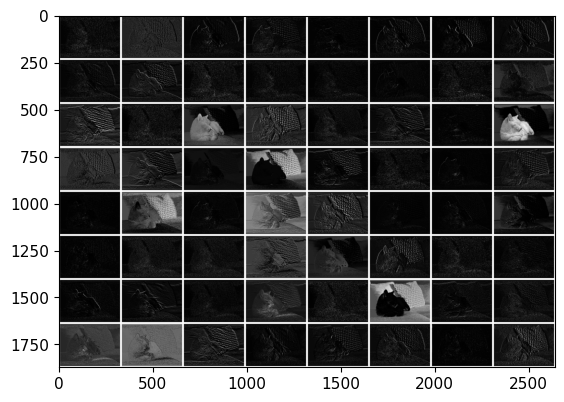

In [19]:
plt.imshow(ret[1], cmap='gray')

- Multiprocessing with Queue
    - whole "tensor_collection" dict in queue
    - while True query for items in queue
- Queue:
    - trying to retrieve data from queue
    - error handling:
        - queue empty

In [1]:
import pickle
# save pickle
def save_pickle(filename, obj):
    with open(str(filename), 'wb') as f:
        pickle.dump(obj, f)
    print("Object saved")
        
# load pickle
def load_pickle(filename):
    with open(str(filename), 'rb') as f:
        obj = pickle.load(f)
    print("Object loaded")
    return obj

In [2]:
#save_pickle('tensor_collection_new.pkl', tensor_collection)
tensor_collection = load_pickle('tensor_collection_new.pkl')

Object loaded


In [3]:
import multiprocessing as mp
import os
import numpy as np
from mp_test import worker_func
import time

In [4]:
dic = tensor_collection

In [16]:
#pool = mp.Pool(processes=8)
mgr = mp.Manager()
mp_q_in = mgr.Queue()
mp_q_out = mgr.Queue()
#pool.apply_async(worker_func, (mp_q_in, mp_q_out))

In [17]:
num_proc = 4
proc_list = []
for i in range(num_proc):
    p = mp.Process(target=worker_func, args=(mp_q_in, mp_q_out))
    proc_list.append(p)
    p.start()

In [18]:
put_val = dic

In [19]:
%%timeit
#put_val = np.array([0,120,10])
#put_val = 'break'
#put_val = dic
#s = time.time()
mp_q_in.put(put_val, block=False)
#print(f"Time elapsed: {(time.time() - s) * 1000} ms")
#mp_q.empty()

620 µs ± 132 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
mp_q_in.empty()

True

In [10]:
mp_q_out.empty()

False

In [11]:
ret = mp_q_out.get()

In [20]:
proc_list[0].terminate()

In [20]:
for p in proc_list:
    try:
        p.terminate()
        p.close()
    except:
        pass

In [8]:
pool.close()
pool.terminate()
pool.join()

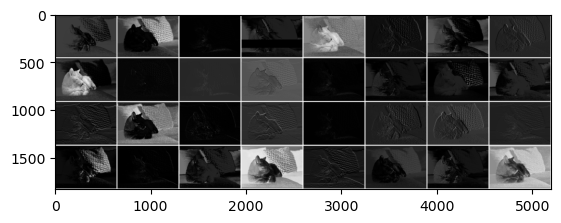

In [14]:
plt.imshow(ret[0], cmap='gray')